# Getting Started in Julia
## Julia Basics
To get started in Julia, we're going to look at two basic concepts: **loops** and **functions**. We won't cover the full Julia syntax, but it is easy to pick up (especially if you are familier with Python). The documentation is available [here](https://docs.julialang.org/en/v1/).

### Jupyter notebooks

Jupyter notebooks are a convenient way to write and run code in interactive Julia sessions. This can be really useful when you are exploring data or writing code that runs over multiple lines.
Notebooks can also display formatted text (like this cell) and images. These notebooks are very commonly used for Julia and Python projects since they allow you to create a narrative around your code and make it easier for other users (and yourself!) to follow.

You can learn more about how to navigate Jupyter notebooks (creating cells, changing between code and text, etc.) [here](https://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb).

### For loops
A **for** loop is a piece of code that repeats the same calculation multiple times.

In [1]:
for i=1:5
    println(i)
end

1
2
3
4
5


In Julia, for loops can iterate over any array.

In [2]:
# Create an array using brackets []
v = ["alpha","beta"]
for i in v
    println(i)
end

alpha
beta


### If statement
An **if** statement evaluates a condition and only runs code if the condition is `true`. If the condition is `false`, the inner code is ignored.

We can include several conditions in the same if statement by adding an **elseif** condition. If we add an **else** statement at the end, this code will run if none of the previous conditions were `true`. 

In [3]:
# if the number is less that 3, print it. 
# if the number is equal to 4, add 2 and print the result
# for other numbers print "skip!"
x = 4

if x<3
    println(x)
elseif x==4
    println(x+2)
else
    println("skip")
end

6


#### Exercise
Write a for loop to evaluate the if statement (above) on the numbers 1 to 5.

In [4]:
for x=1:5
    if x<3
        println(x)
    elseif x==4
        println(x+2)
    else
        println("skip")
    end
end

1
2
skip
6
skip


### While loops
A **while** loop is a combination of  **for** and **if**. If the **while** condition is `true`, it evaluates the code inside the loop and then returns to check the condition again. It will keep evaluating the inner code until the condition is no longer `true`.

Note: when writing while loops, make sure that the condition will eventually be `false` to avoid an infinite loop!            

In [5]:
# while loop
i = 1
while i<5
    println(i)
    i += 1 # this is just a quicker way of saying i = i + 1
end

1
2
3
4


## Functions
We've already learned how to use built-in functions in `R` and Julia. You can also write your own functions to store and re-use code that you'll need to run many times. In Julia, functions are especially beneficial because Julia's built-in complier will learn how to run them efficiently.

Each function has a few basic components:
* name (this is what you will use to run the function)
* arguments/input data
* body (code that runs in the function)
* output

In [6]:
function addOne(x) # name(arguments)
    # body of the function
    y = x+1
    return(y) # output
end

addOne(5)

6

We can also print variables in our print statements by using the "$" operator.

In [7]:
# function
function Maximum(a,b) # name(arguments)
    # body of the function
    if a>b
        println("$a is bigger than $b")
        return(a) # output
    elseif b>a
        println("$b is bigger than $a")
        return(b) # output
    elseif b==a
        println("$a is equal to $b")
        return(a) # output
    end
end

Maximum (generic function with 1 method)

In [8]:
m = Maximum(2,1)
println("m=$m")

2 is bigger than 1
m=2


#### Exercise 1: Practicing Functions
Write a function that takes in a 1D array of numbers and returns another array containing only the even numbers from the first array. Hint: a number x is even if we divide it by 2 and get a remainder of 0. In Julia, use x%2 to calculate the remainder.

#### Advanced Exercise: Handling errors
Functions can behave in unexpected ways if their input doesn't match the expected type. For example, try running one of the functions above with strings as inputs.
Look up the try/catch statement here: https://docs.julialang.org/en/v1/manual/control-flow/#Exception-Handling-1. Can you implement this to provide a warning if the function code doesn't succeed?

## Intro to Data Manipulation and Visualization in Julia
In this section, we will learn how to read in data and conduct data manipulation and visualization in Julia. This is an important step in solving a real-world optimization problem, as real-world data can be messy and difficult to work with.

## DataFrames
Like data frames in `R`, `Julia` also has a similar structure for datasets. You will need to load the packages `DataFrames` and `CSV` first:

In [9]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("CSV")

In [10]:
using DataFrames, CSV

Now let's read in the data:

In [11]:
df = CSV.read("data/NBA_data_2018_2019.csv", DataFrame);

To view the first few rows of the data, you can use `first()`, or index the dataframe similar to what you did you in `R`:

To subset rows, pass in the indices in the first dimension. If you are not subsetting to particular columns, just pass in ``:`` in the second dimension (as opposed to leaving it blank in `R`).

In [12]:
df[1:5,:]
first(df,5)

,ID,Player,Username,Pos,Age,Tm,G,MP,PER
,Int64,String,String,String,Int64,String,Int64,Int64,Float64
1,5,Bam Adebayo,adebaba01,C,21,MIA,82,1913,17.9
2,8,LaMarcus Aldridge,aldrila01,C,33,SAS,81,2687,22.9
3,11,Jarrett Allen,allenja01,C,20,BRK,80,2096,18.5
4,13,Al-Farouq Aminu,aminual01,PF,28,POR,81,2292,13.2
5,20,Carmelo Anthony,anthoca01,PF,34,HOU,10,294,10.9


To index a column using column name, simply put a `:` in front of the name to make it into a Julia symbol. 
We could also write the column name like this: `symbol("Player")`.


To select all rows, you can either type `[:,:columnName]` or `[!,:columnName]`.

In [13]:
df[!,:Player]

200-element Vector{String}:
 "Bam Adebayo"
 "LaMarcus Aldridge"
 "Jarrett Allen"
 "Al-Farouq Aminu"
 "Carmelo Anthony"
 "Ryan Arcidiacono"
 "Trevor Ariza"
 "D.J. Augustin"
 "Marvin Bagley"
 "Harrison Barnes"
 "Harrison Barnes"
 "Harrison Barnes"
 "Kent Bazemore"
 ⋮
 "Dwyane Wade"
 "Kemba Walker"
 "Tyrone Wallace"
 "Russell Westbrook"
 "Derrick White"
 "Hassan Whiteside"
 "Lou Williams"
 "Marvin Williams"
 "Justise Winslow"
 "Delon Wright"
 "Thaddeus Young"
 "Trae Young"


## Plotting in Julia

Julia also has extensive support for plotting. 

* `Plots.jl` is a powerful and concise tool for plotting. It provides the interface to many other plotting packages with simple and consistent syntax.
* `StatPlots.jl` offers the DataFrames integration for `Plots`. You can pass in a data frame, and map aesthetics to the column names directly. 
* We'll use `PyPlot` as the backend for our plotting, so we we will also install this package.

Using these would be somewhat similar to working with `ggplot2` in `R`. 

Here is an example of a scatter plot based on the `nba` data, where the x axis is the `Age`, y axis is the Player Efficiency Rating (`PER`), and the grouping (therefore the colors) are based on the position (`Pos`).

In [14]:
# using Pkg
# Pkg.add("Plots")
# Pkg.add("StatsPlots")
# Pkg.add("PyPlot")

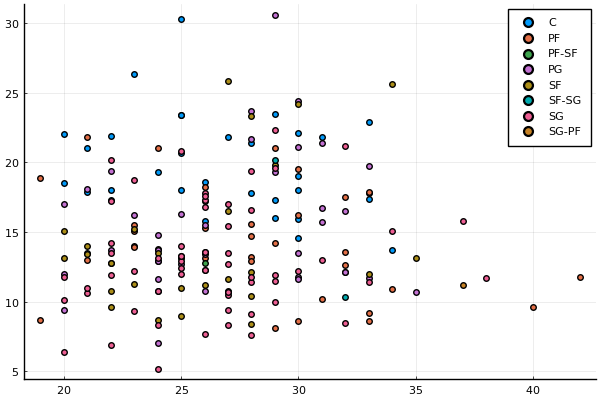

In [15]:
using Plots
using StatsPlots
pyplot()
scatter(df[!,:Age],df[!,:PER],group=df[!,:Pos])

We can make the plot more interesting by adding a few custom settings. For example:
* Give it a title
* Provide xlabel and ylabel
* Change the transparency, shape, and size of the dots
* change background color to dark grey

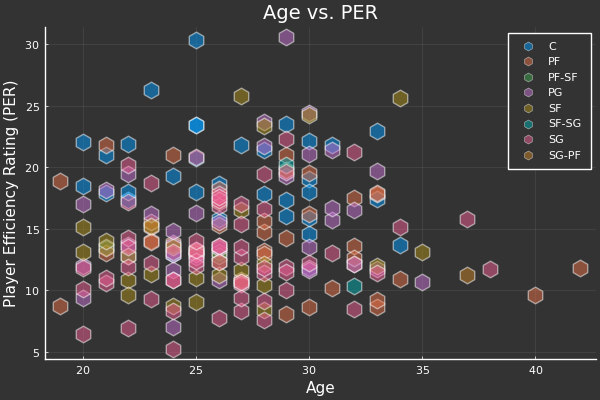

In [16]:
scatter(df[!,:Age],df[!,:PER],group=df[!,:Pos],
        title = "Age vs. PER",
        xlabel = "Age", ylabel = "Player Efficiency Rating (PER)",
        m=(0.5, :hex, 12),
        bg=RGB(.2,.2,.2))

You can also do a box plot (with the violin plot in the background) grouped by the species. Note the `!` in `boxplot!` adds the current plot to the existing one. 

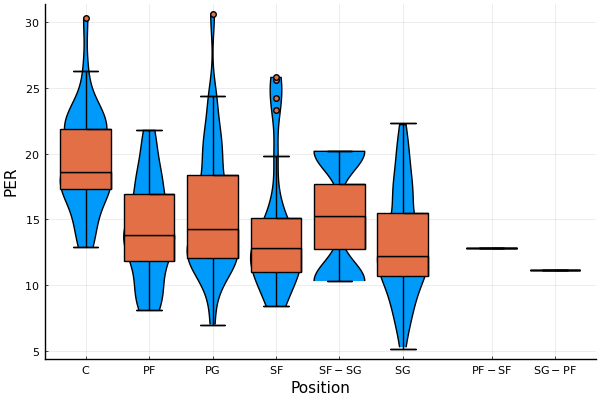

In [17]:
violin(df[!,:Pos],df[!,:PER])
boxplot!(df[!,:Pos],df[!,:PER], leg=false,
    xlabel = "Position", ylabel = "PER")

There are many other types of plots and custom options. You can explore more from the [Plots.jl tutorial](http://docs.juliaplots.org/latest/tutorial/).

#### Exercise: Plotting Icecream data

This time, we are going to read in a dataset directly from the package `RDatasets`. Use the following syntax 
```dataset("Ecdat", "Icecream")``` and save it as a dataframe called `icecream`. It can be helpful to use these pre-loaded datasets to experiment with code.

The dataset is on the ice cream consumption. The columns are:
* `Cons`: consumption level of ice cream
* `Income`: income level
* `Price`: price of ice cream
* `Temperature`: outside temperature at time of measurement

Inspect the first few rows of the data.

In [18]:
# Pkg.add("RDatasets")

In [19]:
using RDatasets
icecream = dataset("Ecdat", "Icecream")
first(icecream,5)

,Cons,Income,Price,Temp
,Float64,Int64,Float64,Int64
1,0.386,78,0.27,41
2,0.374,79,0.282,56
3,0.393,81,0.277,63
4,0.425,80,0.28,68
5,0.406,76,0.272,69


##### Question 1: How is income related to Consumption?

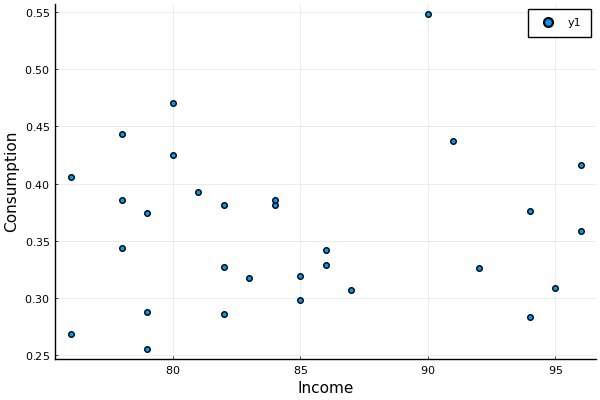

In [20]:
scatter(icecream[!,:Income], icecream[!,:Cons],
    xlabel = "Income", ylabel = "Consumption")

##### Question 2: Do you see a positive relationship between the temperature and revenue?
Hint: we'll start by creating the `Revenue` variable as the product between `Price` and `Cons`. 



In [21]:
# To perform element-wise operations, we add a "." before the operator. 
# This command will return a column where for each row, Price is multiplied by Consumption
icecream[!,:Revenue] = icecream[!,:Price] .* icecream[!,:Cons]

30-element Vector{Float64}:
 0.10422000000000001
 0.10546799999999999
 0.10886100000000001
 0.11900000000000001
 0.11043200000000002
 0.090128
 0.089925
 0.07689599999999999
 0.071285
 0.070912
 0.08065199999999999
 0.08046
 0.08948800000000001
 ⋮
 0.10692200000000002
 0.09473400000000001
 0.093148
 0.08810899999999999
 0.078668
 0.09290999999999999
 0.087138
 0.095135
 0.09964
 0.11024
 0.11711600000000001
 0.14248000000000002

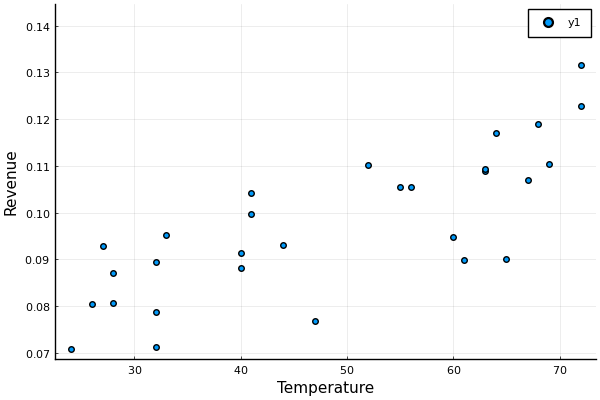

In [22]:
scatter(icecream[!,:Temp], icecream[!,:Revenue],
xlabel = "Temperature", ylabel = "Revenue")

##### Question 3: How does consumption relate to income?
We'll first create a new variable `IncomeGroup` that assigns label to each row based on how much income was recorded (e.g. you could have 'low', 'medium' and 'high' groups). Then, plot the distribution of the consumption over the different groups.

In [23]:
function get_income_group(x)
    if (x < 80) 
        gr = "low"
    elseif (x < 85)
        gr = "medium"
    else 
        gr = "high"
    end
end

icecream[!,:IncomeGroup] = map(get_income_group,icecream[!,:Income])

30-element Vector{String}:
 "low"
 "low"
 "medium"
 "medium"
 "low"
 "low"
 "medium"
 "low"
 "low"
 "low"
 "medium"
 "high"
 "high"
 ⋮
 "medium"
 "high"
 "high"
 "high"
 "high"
 "high"
 "high"
 "high"
 "high"
 "high"
 "high"
 "high"

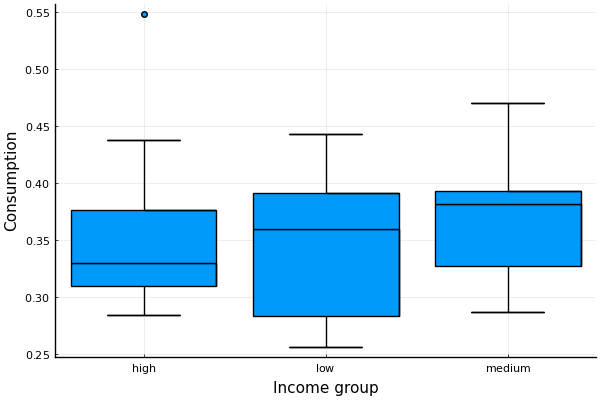

In [24]:
boxplot(icecream[!,:IncomeGroup], icecream[!,:Cons], leg=false,
xlabel = "Income group", ylabel = "Consumption")